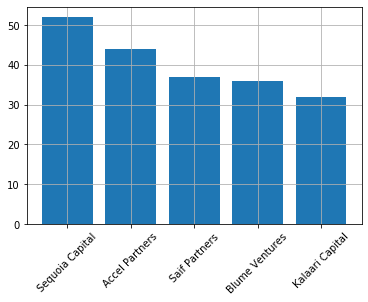

In [3]:
'''
Q.2
Even after trying for so many times, your friend’s startup could not find the investment. 
So you decided to take this matter in your hand and try to find the list of investors 
who probably can invest in your friend’s startup. Your list will increase the chance of 
your friend startup getting some initial investment by contacting these investors. Find 
the top 5 investors who have invested maximum number of times (consider repeat investments 
in one company also). In a startup, multiple investors might have invested. So consider 
each investor for that startup. Ignore undisclosed investors.

Answer: Now I know the locations wherein my friend wants to establish the startup, so I can eliminate
all other cities. In order to do that first I have followed the same process of updating the names and
all. Once that has been done, I have used one function to make all other city as '' so that I can eliminate
using this condition. So my funciton filter_city takes one argument and argument is checked whether it 
is present in the set target_locations wherein I have mentioned specified city names. If name present then
do nothing other than make ''. In the next step I have picked all the indices where CityLocation is ''
after that I have used boolean indexing on the data_frame and all other cities got filtered out. 
       
       In second part, I have made one investors dictionary which will help me get the count of startup
investment. After following the first process, now I am making sure that I have no missing value in
InvestorNames by dropping all rows wherein InvestorName(s) is/are missing. In InvestorNames column there could 
be multiple names so to update accordingly using investor_names method, this method takes one argument of investornames
and split on the basis of ',' so I will get all the names which I have stored in names and now I have iterator over
all the investor names and updated the occurence of investorname in the investors dictionary. I have handle one case
that is after spliting we might get empty string so name should not be empty. 

       Last part of the problem boil down to simply making one list of list where the first element of the inner
list will be the count and second will be the name of the investor. After that I have sorted the list of list based 
on my first column and from there I have ignored the first one as it is undisclosed investors and I put names and 
values in a different lists so I will need to pass two argument in bar graph function. From the bar graph we can see
that Sequoia Capital has the highest number of investment in the startups. So if my friend approaches Sequoia Capital 
then it will give him the maximum chance of getting investment. 

'''








# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}


# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()


# Filter Cities and make other null
def filter_city(city):
    if city in target_locations:
        return city
    return ''


# Will store the total number of times invested in a startup
investors = {} 


def investor_names(investor):
    names = investor.split(',')
    for name in names:
        if name!='':
            name = name.strip().title()
            investors[name]  = investors.get(name,0)+1 # Store the count of investment
    return investors



# File data to Pandas DataFrame
df_startups = pd.read_csv('startup_funding.csv',encoding='utf-8')
df_startups['CityLocation'].dropna(inplace = True) # Cities without any name removed
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)


# Only cities where Friend wants to estabilish startup.
df_startups['CityLocation'] = df_startups['CityLocation'].apply(filter_city)
index = df_startups[df_startups['CityLocation']==''].index
df_startups.drop(index,inplace=True)

# Finding Top Five Investors which have invested in specified location's startups
df_startups['InvestorsName'].dropna(inplace = True)
df_startups['InvestorsName'] = df_startups['InvestorsName'].apply(investor_names)

name_investmentCount = [[value,key] for key,value in investors.items()]

name_investmentCount.sort(reverse=True)

investor = [ i[1] for i in name_investmentCount[1:6]]
counts =  [ i[0] for i in name_investmentCount[1:6]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
